In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("DengueRisk_(Scaling  normalization (StandardScaler)].csv")

# Preview dataset
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4366, 35)


,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,-0.959489,-0.849928,-0.423251,0.339925,-0.745342,-1.376816,-0.014035,-1.440448,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,-0.715774,-0.502382,-0.337936,-0.646809,0.438579,-1.570933,-0.174945,-0.804776,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,-2.384842,-2.240112,-2.001570,1.073927,-1.401267,-1.325196,-1.124318,-1.914984,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,-0.543415,-1.093210,0.173951,0.778175,-0.009423,-1.454355,0.339969,-1.189135,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,-0.091161,0.227465,0.045979,-0.275776,0.185420,-1.312302,0.179058,-0.030144,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
# Drop the 'yearweek' column
df = df.drop(columns=["YearWeek"])

print("✅ Dropped 'yearweek' column")
print("Remaining columns:", df.columns.tolist())

✅ Dropped 'yearweek' column
Remaining columns: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya', 'risk_level']


In [3]:
# Assume 'risk_level' is your target column
X = df.drop(columns=["risk_level"], errors="ignore")
y = df["risk_level"] if "risk_level" in df.columns else None

print("Features shape:", X.shape)
if y is not None:
    print("Target distribution:\n", y.value_counts())

Features shape: (4366, 33)
Target distribution:
 risk_level
0    3183
1    1183
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after scaling:", X_scaled.shape)

Shape after scaling: (4366, 33)


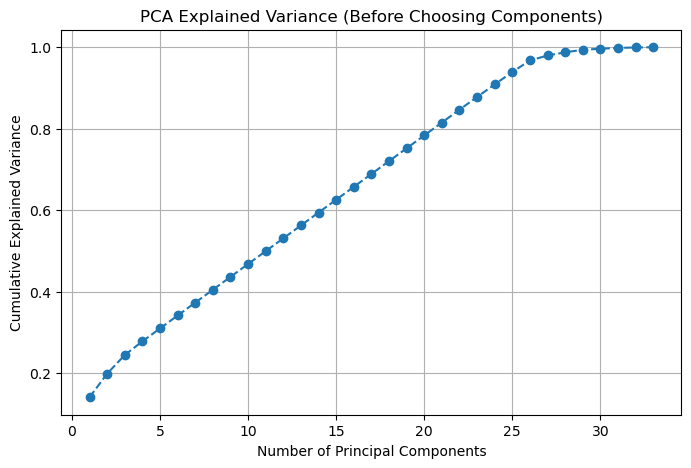

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA with all components
pca_full = PCA()
pca_full.fit(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance (Before Choosing Components)")
plt.grid(True)
plt.show()


In [6]:
# If you have a known target column, set it here; otherwise keep None.
target_col = locals().get('target_col', None)  # e.g., 'risk_level' or 'quality'

# Build numeric-only feature frame and drop target if present
X_num = df.select_dtypes(include=['number']).copy()
if target_col is not None and target_col in X_num.columns:
    X_num = X_num.drop(columns=[target_col])

print('Numeric columns used for PCA:', list(X_num.columns))

Numeric columns used for PCA: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya', 'risk_level']


In [7]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)

Shape after PCA: (4366, 26)


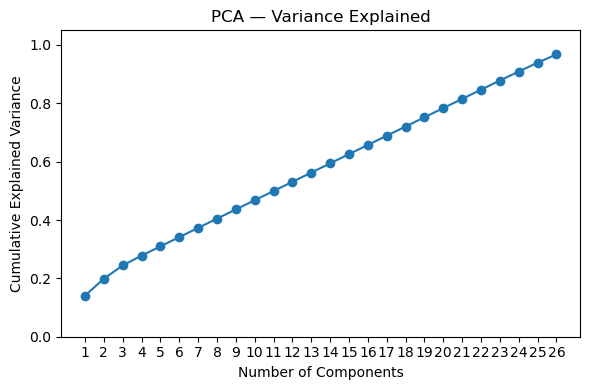

In [8]:
X_for_pca = X_num.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_pca)

pca_obj = globals().get('pca', None)
X_pca = globals().get('X_pca', None)

if pca_obj is None or X_pca is None:
    pca_obj = PCA(n_components=min(10, X_scaled.shape[1]))
    X_pca = pca_obj.fit_transform(X_scaled)

# Variance explained curve
cum_var = np.cumsum(pca_obj.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA — Variance Explained")
plt.xticks(range(1, len(cum_var)+1))
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

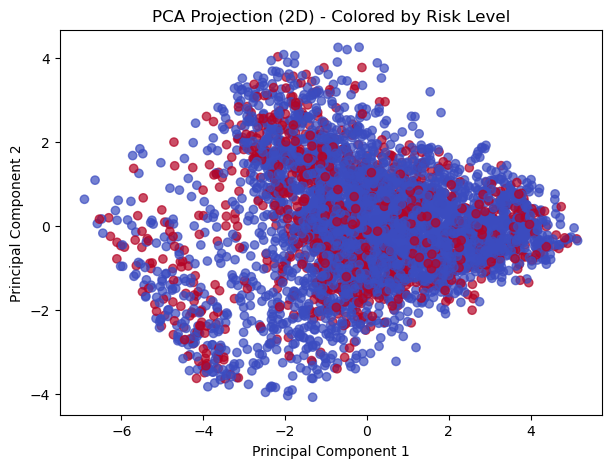

In [9]:
if y is not None:
    plt.figure(figsize=(7,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection (2D) - Colored by Risk Level")
    plt.show()

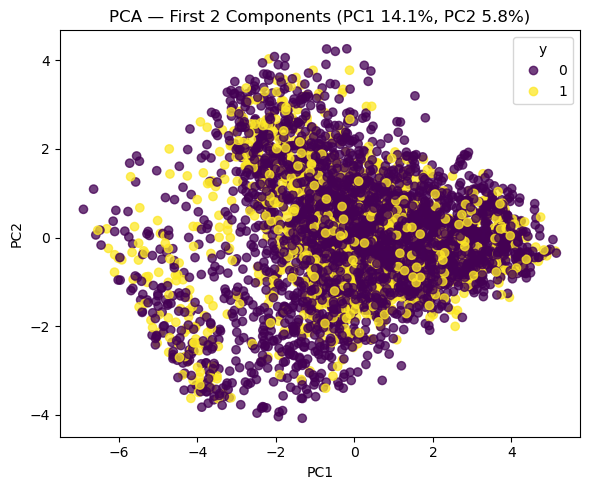

In [10]:
#2D scatter (After PCA)
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(6,5))
    if y is not None:
        # color by class if y exists
        scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.75)
        plt.legend(*scatter.legend_elements(), title="y", loc="best")
    else:
        plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.75)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    var1 = pca_obj.explained_variance_ratio_[0]*100
    var2 = pca_obj.explained_variance_ratio_[1]*100
    plt.title(f"PCA — First 2 Components (PC1 {var1:.1f}%, PC2 {var2:.1f}%)")
    plt.tight_layout()
    plt.show()
else:
    print("PCA scatter skipped: less than 2 components.")

In [11]:
# Convert to DataFrame
pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)

# Add target column back
if y is not None:
    df_pca["risk_level"] = y.values

# Save new CSV
df_pca.to_csv("DengueRisk_Final_processed_dataset.csv", index=False)

print("✅ Saved PCA dataset as DengueRisk_PCA.csv")
print("Final shape:", df_pca.shape)

✅ Saved PCA dataset as DengueRisk_PCA.csv
Final shape: (4366, 27)


In [12]:
# --- Libraries (safe to re-run) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance

plt.rcParams['figure.dpi'] = 110
plt.rcParams['axes.grid'] = True

In [13]:

# --- Resolve X (features) and y (target) from existing variables or infer from df ---
def _first_defined(ns, names):
    for name in names:
        if name in ns and ns[name] is not None:
            return ns[name]
    return None

g = globals()

# Try y first (target)
y = _first_defined(g, ['y','y_train','y_full'])
if y is None and 'df' in g:
    df_guess = g['df']
    target_candidates = ['risk_level','quality','target','label','y']
    t = next((c for c in target_candidates if isinstance(df_guess, pd.DataFrame) and c in df_guess.columns), None)
    if t:
        y = df_guess[t]
    else:
        y = None  # may be set later if not classification

# Try X (features)
X = _first_defined(g, ['X_encoded','X_selected','X_numeric','X_num','X_scaled','X'])
if X is None and 'df' in g:
    df_guess = g['df']
    if isinstance(df_guess, pd.DataFrame):
        if y is not None and hasattr(y, 'name') and y.name in df_guess.columns:
            X = df_guess.select_dtypes(include='number').drop(columns=[y.name], errors='ignore')
        else:
            # drop common target names if present
            X = df_guess.select_dtypes(include='number').drop(columns=['risk_level','quality','target','label','y'], errors='ignore')

assert X is not None and isinstance(X, (pd.DataFrame, np.ndarray)), "Could not infer X. Please set X (features) before running."
if isinstance(X, np.ndarray):
    X_df = pd.DataFrame(X)
else:
    X_df = X.copy()

# Keep a numeric-only copy for EDA
X_num = X_df.select_dtypes(include='number')
print(f"Resolved X with shape {X_num.shape} " + (f"and y with shape {getattr(y,'shape',None)}" if y is not None else "(no y detected)"))


Resolved X with shape (4366, 34) and y with shape (4366,)


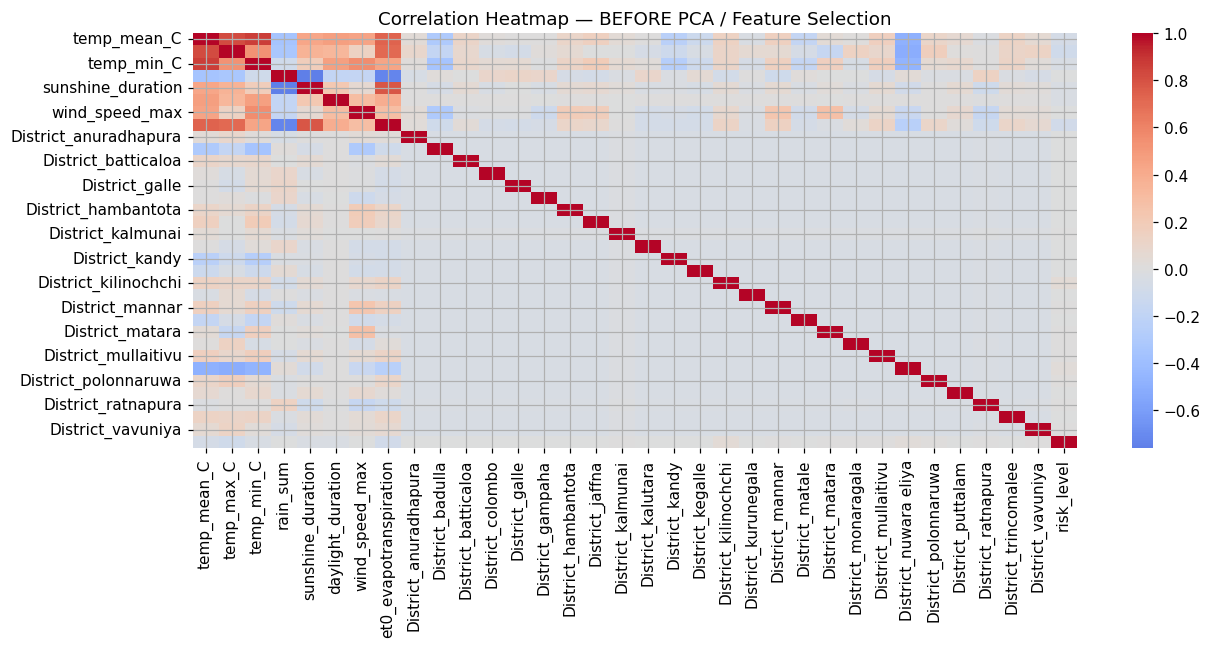

In [14]:
# --- BEFORE (Feature Space): Correlation heatmap ---
if X_num.shape[1] >= 2:
    plt.figure(figsize=(min(12, 0.5*X_num.shape[1]+4), 6))
    corr = X_num.corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap — BEFORE PCA / Feature Selection")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric features to plot a correlation heatmap.")

In [15]:
# --- PREP FOR ANOVA (run BEFORE SelectKBest) ---
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# 0) Tell me your target column name (edit this!)
target_col = "risk_level"   # or "quality", etc.

# 1) Build y and X_num cleanly
y = df[target_col].copy()
X_num = df.select_dtypes(include=[np.number]).copy()
if target_col in X_num.columns:
    X_num = X_num.drop(columns=[target_col])

# 2) Align X and y (drop any mismatched rows)
X_num = X_num.loc[y.index]

# 3) Handle NaNs (median fill keeps distributions ok for ANOVA)
X_num = X_num.fillna(X_num.median(numeric_only=True))

# 4) Drop globally-constant columns first
if X_num.shape[1] > 0:
    vt = VarianceThreshold(0.0)
    keep_mask = vt.fit(X_num).get_support()
    X_num = X_num.loc[:, keep_mask]

# 5) Drop features that are constant *within any class* of y
#    (this is what actually causes the divide-by-zero in ANOVA)
def keep_not_within_class_constant(X_df, y_series):
    keep_cols = []
    classes = pd.Series(y_series).dropna().unique()
    for c in X_df.columns:
        ok_all_classes = True
        for cls in classes:
            vals = X_df.loc[y_series == cls, c]
            # require at least 2 distinct values in that class
            if vals.nunique(dropna=True) < 2:
                ok_all_classes = False
                break
        if ok_all_classes:
            keep_cols.append(c)
    return X_df[keep_cols]

if X_num.shape[1] > 0 and pd.Series(y).nunique() >= 2:
    X_num = keep_not_within_class_constant(X_num, y)

print("X_num shape after cleaning:", X_num.shape)
print("Classes and counts in y:\n", pd.Series(y).value_counts())


X_num shape after cleaning: (4366, 33)
Classes and counts in y:
 risk_level
0    3183
1    1183
Name: count, dtype: int64


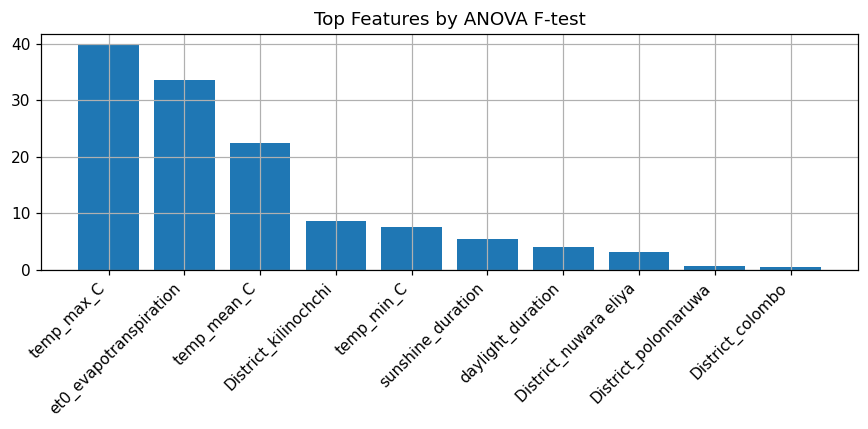

Selected features: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'sunshine_duration', 'daylight_duration', 'et0_evapotranspiration', 'District_kilinochchi', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam']


In [16]:
# --- Short & Safe ANOVA (warning-free) ---
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

k = min(10, max(1, X_num.shape[1]))
skb = SelectKBest(score_func=f_classif, k=k)
X_new = skb.fit_transform(X_num, y)

# Scores for plotting (replace inf/nan just for the chart)
import numpy as np
scores = np.asarray(skb.scores_, dtype=float)
scores_plot = np.nan_to_num(scores, nan=0.0, posinf=0.0, neginf=0.0)
feat_names = X_num.columns.to_numpy()

order = np.argsort(scores_plot)[::-1][:k]
plt.figure(figsize=(8,4))
plt.bar(feat_names[order], scores_plot[order])
plt.xticks(rotation=45, ha='right')
plt.title("Top Features by ANOVA F-test")
plt.tight_layout()
plt.show()

print("Selected features:", feat_names[skb.get_support()].tolist())


Explained variance (first 10): [0.1403 0.0585 0.0458 0.0337 0.0322 0.0318 0.0317 0.0317 0.0316 0.0316]
Cumulative variance (first 10): [0.1403 0.1988 0.2446 0.2783 0.3105 0.3423 0.3739 0.4056 0.4372 0.4689]
Selected n_components (≥95% variance): 26


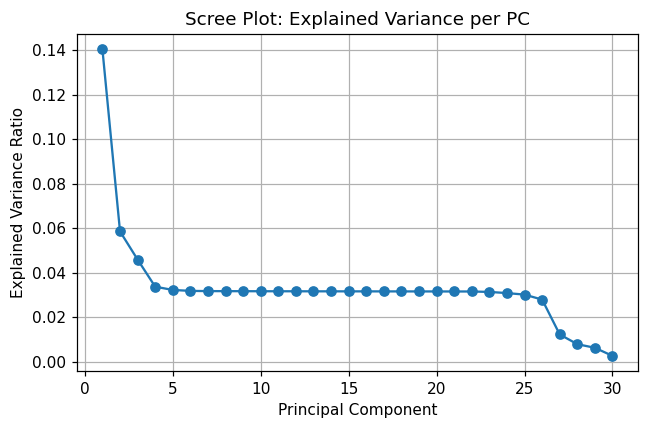

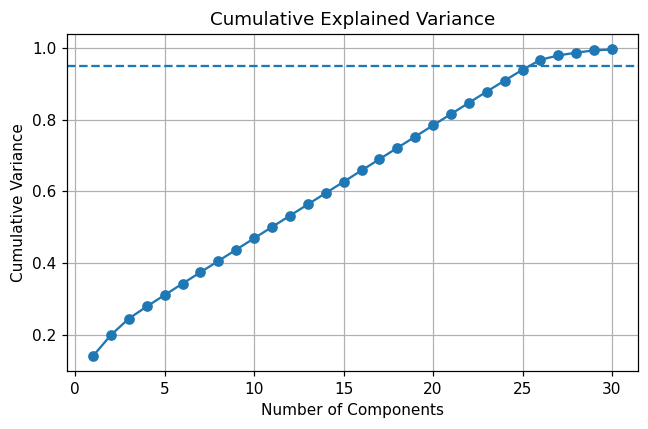

In [18]:

# --- PCA variance inspection (decide k) ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ==== CONFIG ====
target = "risk_level"   # change if your target name is different
variance_target = 0.95  # choose 0.90–0.99 depending on tradeoff

# Expecting df_ready to exist from previous steps
assert 'df' in globals(), "df_ready not found. Make sure your cleaned/encoded DataFrame is named df_ready."

# Prepare features/labels
X = df.drop(columns=[target])
y = df[target]

# Train/test split BEFORE any fitting (leakage-safe)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only on train, then apply to test
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Temporary PCA to inspect variance across many PCs
max_k = min(30, X_train.shape[1])  # cap for clean plots
pca_probe = PCA(n_components=max_k, random_state=42)
pca_probe.fit(X_train_scaled)

expl_var = pca_probe.explained_variance_ratio_
cum_var  = np.cumsum(expl_var)

# Choose k by first index where cumulative variance >= target
k = int(np.argmax(cum_var >= variance_target) + 1) if len(cum_var) else 0
print(f"Explained variance (first 10): {np.round(expl_var[:10], 4)}")
print(f"Cumulative variance (first 10): {np.round(cum_var[:10], 4)}")
print(f"Selected n_components (≥{int(variance_target*100)}% variance): {k}")

# Ensure results dir exists for saving plots
os.makedirs("results/eda_visualizations", exist_ok=True)

# Scree plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(expl_var)+1), expl_var, marker='o')
plt.title("Scree Plot: Explained Variance per PC")
plt.xlabel("Principal Component"); plt.ylabel("Explained Variance Ratio")
plt.tight_layout(); plt.savefig("results/eda_visualizations/pca_scree.png", dpi=150); plt.show()

# Cumulative variance plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(variance_target, linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components"); plt.ylabel("Cumulative Variance")
plt.tight_layout(); plt.savefig("results/eda_visualizations/pca_cumulative.png", dpi=150); plt.show()


Final PCA shapes → train: (3492, 26), test: (874, 26)
Variance kept: 0.9676

Top 5 features for PC1:
temp_mean_C               0.439940
et0_evapotranspiration    0.404522
temp_max_C                0.368555
temp_min_C                0.365384
sunshine_duration         0.284942
Name: PC1, dtype: float64

Top 5 features for PC2:
rain_sum                  0.476055
sunshine_duration         0.444301
temp_min_C                0.390296
wind_speed_max            0.307741
et0_evapotranspiration    0.290609
Name: PC2, dtype: float64

Top 5 features for PC3:
wind_speed_max           0.452661
temp_max_C               0.381316
District_matara          0.378953
District_nuwara eliya    0.355927
District_ratnapura       0.251011
Name: PC3, dtype: float64

Top 5 features for PC4:
District_kalutara      0.284018
District_jaffna        0.282522
District_mullaitivu    0.277009
District_kurunegala    0.269906
District_kandy         0.269728
Name: PC4, dtype: float64

Top 5 features for PC5:
District_mullai

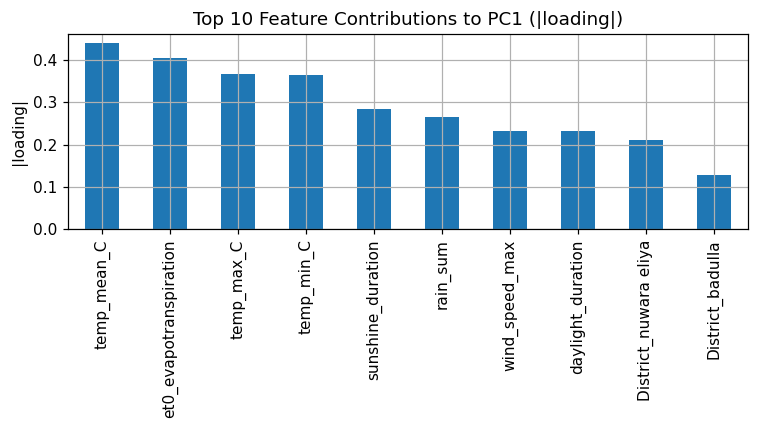

In [19]:

# --- Fit final PCA with chosen k and inspect loadings ---
from sklearn.decomposition import PCA

assert 'k' in globals() and k > 0, "k not computed. Run the variance inspection cell first."

pca = PCA(n_components=k, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print(f"Final PCA shapes → train: {X_train_pca.shape}, test: {X_test_pca.shape}")
print("Variance kept:", round(pca.explained_variance_ratio_.sum(), 4))

# Loadings: which original features contribute most to each PC (by absolute weight)
loadings = pd.DataFrame(
    np.abs(pca.components_).T,  # abs to focus on magnitude
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(k)]
).sort_index()

# Show top contributors per PC
top_n = 5
for i in range(k):
    top_feats = loadings.iloc[:, i].sort_values(ascending=False).head(top_n)
    print(f"\nTop {top_n} features for PC{i+1}:")
    print(top_feats)

# Optional: barplot for PC1 contributors
plt.figure(figsize=(7,4))
loadings["PC1"].sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Feature Contributions to PC1 (|loading|)")
plt.ylabel("|loading|")
plt.tight_layout()
plt.savefig("results/eda_visualizations/pca_pc1_top10.png", dpi=150)
plt.show()
